<a href="https://colab.research.google.com/github/ashutoshsingh1/Predict-tags-on-StackOverflow-with-linear-models/blob/master/Vision_Dataset_Set2_group_113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question No.1. Vision Dataset: CIFAR-10- It dataset consists of 60000 32x32 colour images in 10
classes. Please find your dataset from the link - https://www.tensorflow.org/datasets/catalog/cifar10 (Links to an external site.)**   (6 marks)

 

Import Libraries/Dataset (0 mark)
Import the required libraries and the dataset (use Google Drive if required).
Check the GPU available (recommended- use free GPU provided by Google Colab).
 

Data Visualization and augmentation (1 mark)
Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).
Apply rotation and height shift augmentation (rotation_range, height_shift_range)to the dataset separately. Print the augmented image and the original image for each class and each augmentation.
Bring the train and test data in the required format.
Print the shapes of train and test data.
 

Model Building (0.2*5 = 1 mark)
Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
Add L2 regularization to all the layers.
Add one layer of dropout at the appropriate position and give reasons.
Choose the appropriate activation function for all the layers.
Print the model summary.
 

Model Compilation (0.25 mark)
Compile the model with the appropriate loss function.
Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
Use accuracy as a metric.
 

Model Training (0.5 + 0.25 = 0.75 mark)
Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.
 

Model Evaluation (0.5 + 0.5 = 1 mark)
Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
Print the two most incorrectly classified images for each class in the test dataset.
 

Hyperparameter Tuning- Build two more additional models by changing the following hyperparameters ONE at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. (1 + 1 = 2 marks)

Optimiser: Use a different optimizer with the appropriate LR value.
Network Depth: Change the number of hidden layers and hidden units for each layer.
Write a comparison between each model and give reasons for the difference in results.

 

# 1. **Import Libraries/Dataset (0 mark)**<BR>
Import the required libraries and the dataset (use Google Drive if required).
Check the GPU available (recommended- use free GPU provided by Google Colab).


####Import libraries



In [27]:
import sys
import gzip
import time
import tensorflow
from keras.datasets import cifar10
from tensorflow.python.client import device_lib
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from matplotlib import pyplot
import seaborn as sns
from tensorflow.keras.optimizers import SGD, Adamax
import numpy as np
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

####Import dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", x_train.shape)

170508288/170498071 [==============================] - 4s 0us/step
x_train shape (50000, 32, 32, 3)
x_test shape (10000, 32, 32, 3)
y_train shape (50000, 1)
y_test shape (50000, 32, 32, 3)


####Available GPU

In [3]:
print(len(device_lib.list_local_devices()))

1


# 2. **Data Visualization and augmentation (1 mark)**<BR> Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library). Apply rotation and height shift augmentation (rotation_range, height_shift_range)to the dataset separately. Print the augmented image and the original image for each class and each augmentation. Bring the train and test data in the required format. Print the shapes of train and test data.

####Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).*italicized text*

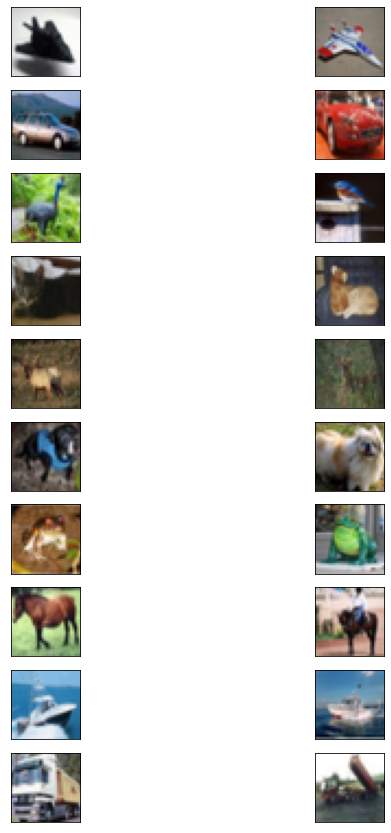

In [4]:
classes = np.unique(y_train)
fig, axs = pyplot.subplots(nrows=len(classes), ncols=2, figsize=(len(classes), 15),
                        subplot_kw={'xticks': [], 'yticks': []})
data = []
for j in classes:
  index = (y_train == j)
  class_data = x_train[index[:,0]][:2]
  data.append(class_data[0])
  data.append(class_data[1])

for ax, image in zip(axs.flat, data):
  ax.imshow(image)

# show the figure
pyplot.show()

####Apply rotation augumentation to the dataset.

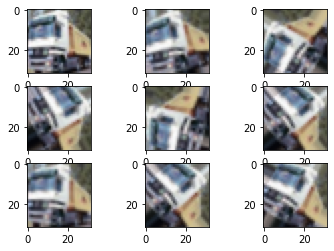

In [5]:
from keras.preprocessing.image import ImageDataGenerator
data = x_train[1] #Taking first image
samples = np.expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
pyplot.subplot(330 + 1)
pyplot.imshow(data) # Actual Image
# generate samples and plot
for i in range(8):
	# define subplot
	pyplot.subplot(330 + 2 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

####Apply height shift augmentation to the dataset.

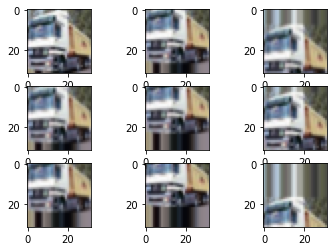

In [6]:
from keras.preprocessing.image import ImageDataGenerator
data = x_train[1] #Taking first image
samples = np.expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
pyplot.subplot(330 + 1) #main data image
pyplot.imshow(data)
# generate samples and plot
for i in range(8):
	# define subplot
	pyplot.subplot(330 + 2 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

####Bring the train and test data in the required format. Print the shapes of train and test data.

In [7]:
nb_classes = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255
print("Shape ---")
print("x_train - ", x_train.shape)
print("y_train - ", y_train.shape)
print("x_test - ", x_test.shape)
print("y_test - ", y_test.shape)

Shape ---
x_train -  (50000, 32, 32, 3)
y_train -  (50000, 1)
x_test -  (10000, 32, 32, 3)
y_test -  (10000, 1)


# 3. **Model Building (0.2*5 = 1 mark)**<BR> Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons. Add L2 regularization to all the layers. Add one layer of dropout at the appropriate position and give reasons. Choose the appropriate activation function for all the layers. Print the model summary.

####Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each.

In [8]:
model = Sequential()
#First Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]))
#Second Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
#Max Pooling
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
#Tird Layer
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
#Fourt Layer
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
#Max Pooling Layer
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
#Flattening Layer
model.add(Flatten())
#First fully connected layer
model.add(Dense(units=128,activation='relu'))
#Output Layer
model.add(Dense(units=10,activation='softmax'))


####Choose the best number for hidden units and give reasons.

**First Layer**<BR>
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]))<BR>
>> 32 filters because input shape is [32, 32, 3]

**Second Layer**<BR>
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
>> 32 filters because input shape is [32, 32, 3]

**Max Pooling**<BR>
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
>> The pool size here 2 means, a pool of 2x2 will be used and in that 2x2 pool

**Third Layer**<BR>
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
>> It should be multiple of First hidden Layer 32*2 = 64

**Fourt Layer**<BR>
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
>> Sililar to third layer

**Max Pooling Layer**<BR>
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
>> The pool size here 2 means, a pool of 2x2 will be used and in that 2x2 pool

**Flattening Layer**<BR>
model.add(Flatten())
>> Flattening Layer is added after the stack of convolutional layers and pooling layers. Flattening layer converts the 3d image vector into 1d. Because after the stack of layers, mentioned before, a final fully connected Dense layer is added

**First fully connected layer**<BR>
model.add(Dense(units=128,activation='relu'))
>> It should be multiple of Fourth layer 64*2=128

**Output Layer**<BR>
model.add(Dense(units=10,activation='softmax'))
>> Because we have 10 Number of classes

####Add L2 regularization to all the layers.
We can add weight regularization to the hidden layer to reduce the overfitting of the model to the training dataset and improve the performance on the holdout set.

We will use the L2 vector norm also called weight decay with a regularization parameter (called alpha or lambda) of 0.001, chosen arbitrarily.

In [9]:
model = Sequential()
#First Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3], kernel_regularizer=l2(0.01)))
#Second Layer
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", kernel_regularizer=l2(0.01)))
#Max Pooling
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
#Tird Layer
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_regularizer=l2(0.01)))
#Fourt Layer
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", kernel_regularizer=l2(0.01)))
#Max Pooling Layer
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
#Flattening Layer
model.add(Flatten())
#First fully connected layer
model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)))
#Output Layer
model.add(Dense(units=10, activation='softmax'))

####Add one layer of dropout at the appropriate position and give reasons.

To prevent overfitting, a dropout layer is added. During training of data, some neurons are disabled randomly. The value passed to neurons mean what fraction of neuron one wants to drop during an iteration. Thus after training, the neurons are not affected highly by the weights of other neurons. As a result of which the the model can generalize better.

In [10]:
def get_model():
  model = Sequential()
  #First Layer
  model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="elu", input_shape=[32,32,3], kernel_regularizer=l2(0.0001)))
  model.add(BatchNormalization())
  #Second Layer
  model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="elu", kernel_regularizer=l2(0.0001)))
  #Max Pooling
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
  model.add(Dropout(0.2))
  
  #Tird Layer
  model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="elu", kernel_regularizer=l2(0.0001)))
  model.add(BatchNormalization())
  #Fourt Layer
  model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="elu", kernel_regularizer=l2(0.0001)))
  model.add(BatchNormalization())
  #Max Pooling Layer
  model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
  model.add(Dropout(0.3))

  #First fully connected layer
  model.add(Dense(units=128, activation='elu', kernel_regularizer=l2(0.0001)))
  model.add(BatchNormalization())
  model.add(Dense(units=128, activation='elu', kernel_regularizer=l2(0.0001)))
  model.add(BatchNormalization())
  #Adding Dropout
  model.add(Dropout(0.5, noise_shape=None, seed=None))
  #Flattening Layer
  model.add(Flatten())
  #Output Layer
  model.add(Dense(units=10, activation='softmax'))
  return model
model = get_model()

####Choose the appropriate activation function for all the layers.
A neural network will almost always have the same activation function in all hidden layers. It is most unusual to vary the activation function through a network model.<BR><BR>
**ReLU (Rectified Linear Activation Function)**<BR>
The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.<BR><BR>
**Sigmoid Hidden Layer Activation Function**<BR>
The sigmoid activation function is also called the logistic function.<BR>
It is the same function used in the logistic regression classification algorithm.<BR>
The function takes any real value as input and outputs values in the range 0 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0.<BR><BR>
**Tanh Hidden Layer Activation Function**<BR>
The hyperbolic tangent activation function is also referred to simply as the Tanh (also “tanh” and “TanH“) function.

It is very similar to the sigmoid activation function and even has the same S-shape.

The function takes any real value as input and outputs values in the range -1 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to -1.0.

**SoftMax function**<BR>
SoftMax function is more elucidated form of Sigmoid function. It is used for multi-class classification. The function calculates the probabilities of a particular class in a function. Thus the output value range of the function is between 0 to 1. The primary difference between Sigmoid function and SoftMax function is, Sigmoid function can be used for binary classification while the SoftMax function can be used for Multi-Class Classification also.

#####**Answer**
**Input Layer**<BR>
**ReLU -** It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.
<BR><BR>
**Output Layer**<BR>
**SoftMax -** The primary difference between Sigmoid function and SoftMax function is, Sigmoid function can be used for binary classification while the SoftMax function can be used for Multi-Class Classification also.

#### Print the model summary.

In [11]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

#4. **Model Training (0.5 + 0.25 = 0.75 mark)**<BR> Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training

####Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size

In [12]:
epoch = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])
start = time.time()
history = model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, 
                    validation_data=(x_test, y_test))
end = time.time()

Epoch 1/50
782/782 [==============================] - 379s 480ms/step - loss: 2.0343 - sparse_categorical_accuracy: 0.4487 - val_loss: 1.5019 - val_sparse_categorical_accuracy: 0.5489
Epoch 2/50
782/782 [==============================] - 338s 432ms/step - loss: 1.2875 - sparse_categorical_accuracy: 0.6017 - val_loss: 0.9988 - val_sparse_categorical_accuracy: 0.6786
Epoch 3/50
782/782 [==============================] - 336s 429ms/step - loss: 1.0209 - sparse_categorical_accuracy: 0.6649 - val_loss: 0.9685 - val_sparse_categorical_accuracy: 0.6788
Epoch 4/50
782/782 [==============================] - 335s 428ms/step - loss: 0.9013 - sparse_categorical_accuracy: 0.7017 - val_loss: 0.8417 - val_sparse_categorical_accuracy: 0.7204
Epoch 5/50
782/782 [==============================] - 347s 444ms/step - loss: 0.8385 - sparse_categorical_accuracy: 0.7229 - val_loss: 0.8636 - val_sparse_categorical_accuracy: 0.7152
Epoch 6/50
782/782 [==============================] - 335s 429ms/step - loss: 0.

####Plot the loss and accuracy history graphs for both train and validation set


dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


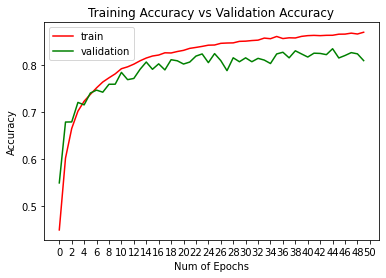

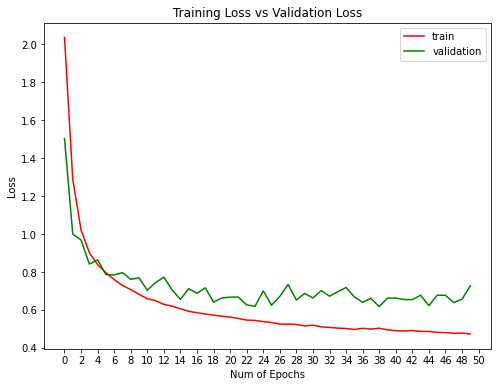

In [13]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
pyplot.figure(0)
pyplot.plot(history.history['sparse_categorical_accuracy'],'r')
pyplot.plot(history.history['val_sparse_categorical_accuracy'],'g')
pyplot.xticks(np.arange(0, epoch+1, 2.0))
pyplot.rcParams['figure.figsize'] = (8, 6)
pyplot.xlabel("Num of Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Training Accuracy vs Validation Accuracy")
pyplot.legend(['train','validation'])

pyplot.figure(1)
pyplot.plot(history.history['loss'],'r')
pyplot.plot(history.history['val_loss'],'g')
pyplot.xticks(np.arange(0, epoch+1, 2.0))
pyplot.rcParams['figure.figsize'] = (8, 6)
pyplot.xlabel("Num of Epochs")
pyplot.ylabel("Loss")
pyplot.title("Training Loss vs Validation Loss")
pyplot.legend(['train','validation'])
pyplot.show()

####Print the total time taken for training

In [14]:
print(f"Training time: {end - start}s")

Training time: 16766.050975322723s


#5. **Model Evaluation (0.5 + 0.5 = 1 mark)**<BR> Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class. Print the two most incorrectly classified images for each class in the test dataset.

####Print the final train and validation loss and accuracy. 

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

313/313 [==============================] - 18s 57ms/step - loss: 0.7266 - sparse_categorical_accuracy: 0.8095
Test accuracy: 0.809499979019165


####Print confusion matrix and classification report for the validation dataset.

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[877  23  25   2  13   1   9   9  20  21]
 [  5 959   0   0   1   1   4   1   1  28]
 [ 77   5 663  12  80  36  92  25   3   7]
 [ 44  13  35 501  60 159 137  29   7  15]
 [ 18   3  20  14 802  15  73  49   3   3]
 [ 19   9  27  49  31 773  45  40   0   7]
 [  7   6  10   4   8   6 952   3   2   2]
 [ 18  10  17   5  26  19  19 877   1   8]
 [ 73  56  10   0   1   2  11   2 825  20]
 [ 25  85   1   3   0   0   6   2  12 866]]


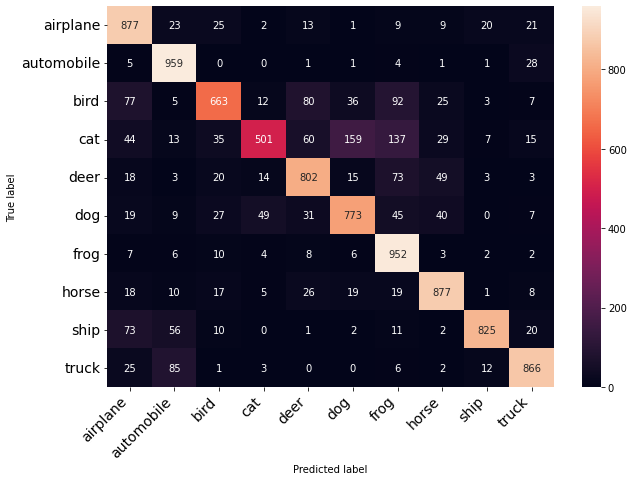

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

def print_confusion_matrix(confusion_matrix, class_names, 
                           figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = pyplot.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    pyplot.show()
Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(y_test,y_pred)[ix].sum())
cm = confusion_matrix(y_test,y_pred)
print(cm)
class_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
    ]
print_confusion_matrix(cm, class_names)

####Analyse and report the best and worst performing class.

**Best predicted Class -** Automobile<BR>
**Worst Predicted Class -** Cat

#### Print the two most incorrectly classified images for each class in the test dataset.

ypred [3 8 1 ... 5 1 7]
y_test [3 8 8 ... 5 1 7]
10000


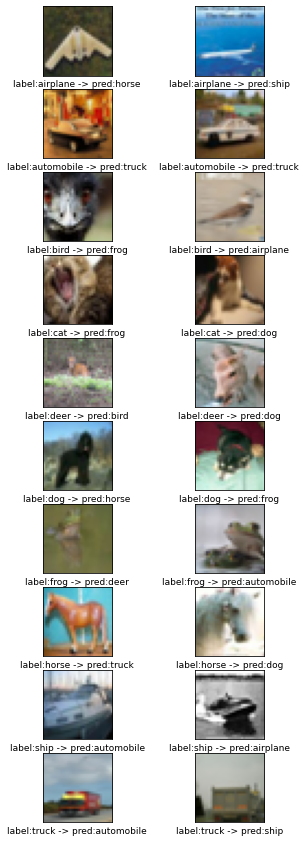

In [18]:
label_names = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck',
}

#y_pred = np.argmax(cifar10_model.predict(x_test), axis=1)
classes = np.unique(y_train)
fig, axs = pyplot.subplots(nrows=len(classes), ncols=2, figsize=(len(classes)*0.5, 15),
                        subplot_kw={'xticks': [], 'yticks': []})
data = []
print("ypred", y_pred)
print("y_test", y_test[:,0])
in_index = y_pred != y_test[:,0]
print(len(y_test))
for j in classes:
  index = np.where((y_test[:,0] == j) & (y_pred != j))
  class_data = x_test[index][:2]
  labels = y_pred[index][:2]
  data.append((class_data[0], j, labels[0]))
  data.append((class_data[1], j, labels[1]))

for ax, image_data in zip(axs.flat, data):
  image, label, pred = image_data
  ax.imshow(image)
  ax.set_xlabel(f'label:{label_names[label]} -> pred:{label_names[pred]}', fontsize=9)
# show the figure
pyplot.show()

#6. **Hyperparameter Tuning-**<BR> Build two more additional models by changing the following hyperparameters ONE at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. (1 + 1 = 2 marks)
1. **Optimiser:** Use a different optimizer with the appropriate LR value.
2. **Network Depth:** Change the number of hidden layers and hidden units for each layer.

####Optimiser
Changing Optimizer 'Adam' to 'Adamax' and train Model again

In [19]:
epoch = 10
optimizer_model = get_model()
optimizer_model.compile(loss="sparse_categorical_crossentropy", optimizer=Adamax(learning_rate=0.001), metrics=["sparse_categorical_accuracy"])
optimizer_history = model.fit(x_train, y_train, epochs=epoch, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 368s 236ms/step - loss: 0.5650 - sparse_categorical_accuracy: 0.8398 - val_loss: 0.6674 - val_sparse_categorical_accuracy: 0.8134
Epoch 2/10
1563/1563 [==============================] - 355s 227ms/step - loss: 0.5515 - sparse_categorical_accuracy: 0.8452 - val_loss: 0.6786 - val_sparse_categorical_accuracy: 0.8192
Epoch 3/10
1563/1563 [==============================] - 355s 227ms/step - loss: 0.5480 - sparse_categorical_accuracy: 0.8473 - val_loss: 0.6795 - val_sparse_categorical_accuracy: 0.8211
Epoch 4/10
1563/1563 [==============================] - 356s 228ms/step - loss: 0.5483 - sparse_categorical_accuracy: 0.8487 - val_loss: 0.6662 - val_sparse_categorical_accuracy: 0.8222
Epoch 5/10
1563/1563 [==============================] - 356s 228ms/step - loss: 0.5504 - sparse_categorical_accuracy: 0.8471 - val_loss: 0.6349 - val_sparse_categorical_accuracy: 0.8304
Epoch 6/10
1563/1563 [==============================] - 354s 227ms/ste

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


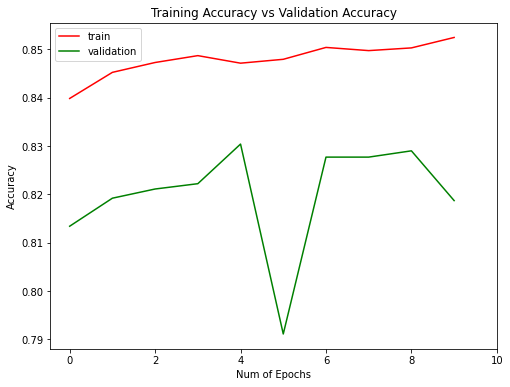

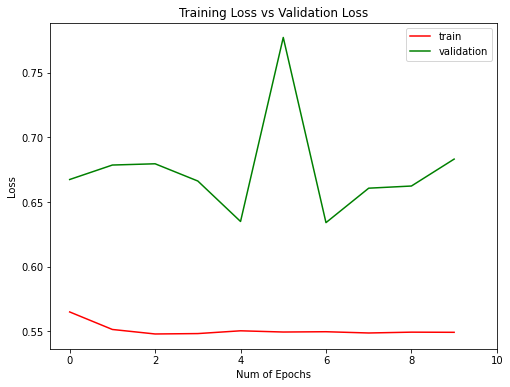

In [20]:
# list all data in history
print(optimizer_history.history.keys())
# summarize history for accuracy
pyplot.figure(0)
pyplot.plot(optimizer_history.history['sparse_categorical_accuracy'],'r')
pyplot.plot(optimizer_history.history['val_sparse_categorical_accuracy'],'g')
pyplot.xticks(np.arange(0, epoch+1, 2.0))
pyplot.rcParams['figure.figsize'] = (8, 6)
pyplot.xlabel("Num of Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Training Accuracy vs Validation Accuracy")
pyplot.legend(['train','validation'])

pyplot.figure(1)
pyplot.plot(optimizer_history.history['loss'],'r')
pyplot.plot(optimizer_history.history['val_loss'],'g')
pyplot.xticks(np.arange(0, epoch+1, 2.0))
pyplot.rcParams['figure.figsize'] = (8, 6)
pyplot.xlabel("Num of Epochs")
pyplot.ylabel("Loss")
pyplot.title("Training Loss vs Validation Loss")
pyplot.legend(['train','validation'])
pyplot.show()

####Network Depth
Change the number of hidden layers and hidden units for each layer.

In [21]:
network_model = Sequential()
#First Layer
#Make 32 => 16
network_model.add(Conv2D(filters=16, kernel_size=3, padding="same", activation="elu", input_shape=[32,32,3], kernel_regularizer=l2(0.0001)))
network_model.add(BatchNormalization())
#Second Layer
#Make 32 => 16
network_model.add(Conv2D(filters=16, kernel_size=3, padding="same", activation="elu", kernel_regularizer=l2(0.0001)))
#Max Pooling
network_model.add(BatchNormalization())
network_model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
network_model.add(Dropout(0.2))
  
#Tird Layer
#Make 64 => 32
network_model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="elu", kernel_regularizer=l2(0.0001)))
network_model.add(BatchNormalization())
#Fourt Layer
#Make 64 => 32
network_model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="elu", kernel_regularizer=l2(0.0001)))
network_model.add(BatchNormalization())
#Max Pooling Layer
network_model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
network_model.add(Dropout(0.3))

#======Drop Layers =====
#First fully connected layer
#network_model.add(Dense(units=128, activation='elu', kernel_regularizer=l2(0.0001)))
#network_model.add(BatchNormalization())
#network_model.add(Dense(units=128, activation='elu', kernel_regularizer=l2(0.0001)))
#network_model.add(BatchNormalization())
#Adding Dropout
#network_model.add(Dropout(0.5, noise_shape=None, seed=None))
#Flattening Layer
network_model.add(Flatten())
#Output Layer
network_model.add(Dense(units=10, activation='softmax'))
epoch = 10
network_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])
network_history = model.fit(x_train, y_train, epochs=epoch, 
                              validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 354s 226ms/step - loss: 0.5445 - sparse_categorical_accuracy: 0.8497 - val_loss: 0.6407 - val_sparse_categorical_accuracy: 0.8309
Epoch 2/10
1563/1563 [==============================] - 383s 245ms/step - loss: 0.5437 - sparse_categorical_accuracy: 0.8535 - val_loss: 0.6960 - val_sparse_categorical_accuracy: 0.8166
Epoch 3/10
1563/1563 [==============================] - 357s 228ms/step - loss: 0.5442 - sparse_categorical_accuracy: 0.8536 - val_loss: 0.6487 - val_sparse_categorical_accuracy: 0.8255
Epoch 4/10
1563/1563 [==============================] - 356s 228ms/step - loss: 0.5395 - sparse_categorical_accuracy: 0.8540 - val_loss: 0.6466 - val_sparse_categorical_accuracy: 0.8302
Epoch 5/10
1563/1563 [==============================] - 356s 227ms/step - loss: 0.5458 - sparse_categorical_accuracy: 0.8529 - val_loss: 0.6671 - val_sparse_categorical_accuracy: 0.8249
Epoch 6/10
1563/1563 [==============================] - 356s 228ms/ste

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


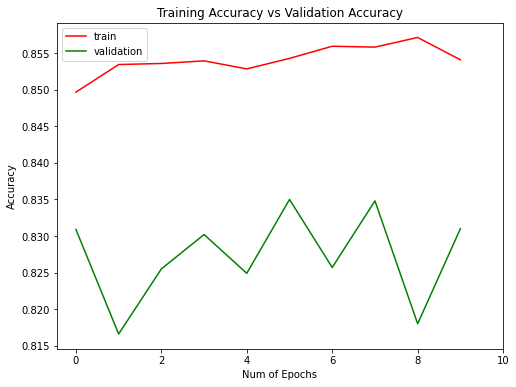

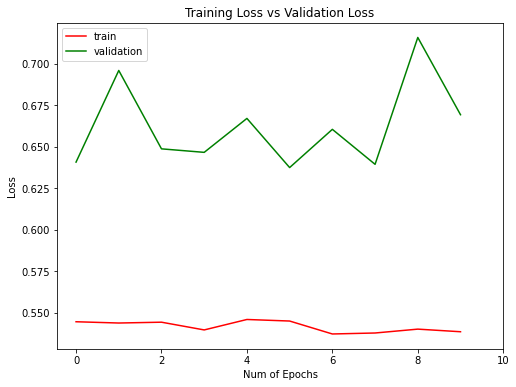

In [22]:
# list all data in history
print(network_history.history.keys())
# summarize history for accuracy
pyplot.figure(0)
pyplot.plot(network_history.history['sparse_categorical_accuracy'],'r')
pyplot.plot(network_history.history['val_sparse_categorical_accuracy'],'g')
pyplot.xticks(np.arange(0, epoch+1, 2.0))
pyplot.rcParams['figure.figsize'] = (8, 6)
pyplot.xlabel("Num of Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Training Accuracy vs Validation Accuracy")
pyplot.legend(['train','validation'])

pyplot.figure(1)
pyplot.plot(network_history.history['loss'],'r')
pyplot.plot(network_history.history['val_loss'],'g')
pyplot.xticks(np.arange(0, epoch+1, 2.0))
pyplot.rcParams['figure.figsize'] = (8, 6)
pyplot.xlabel("Num of Epochs")
pyplot.ylabel("Loss")
pyplot.title("Training Loss vs Validation Loss")
pyplot.legend(['train','validation'])
pyplot.show()

####Comparison between each model and give reasons for the difference in results.

In [26]:
print("Optimizer Model -", optimizer_model.get_config())
print("Network Model", network_model.get_config())
print("Compare - ", optimizer_model.get_config()['layers'] == network_model.get_config()['layers'])

Optimizer Model - {'name': 'sequential_3', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 32, 32, 3), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_12_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_12', 'trainable': True, 'batch_input_shape': (None, 32, 32, 3), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'elu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': {'class_name': 'L2', 'config': {'l2': 9.999999747378752e-05}}, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_6', 'trainable': True, 'dtype': 'float32', 'axis':

<th> Model Name</th><th>Accuracy</th><th>Loss</th><th>Val Acc</th><th>Val Loss</th> <BR>     
<td>Optimizer Model</td><td>85.25%</td><td>0.55</td><td>81.87%</td><td>0.68</td><BR>
<td>Network Model</td><td>85.41%</td><td>0.55</td><td>83.10%</td><td>0.67</td><BR><BR> 


**Conslusion** <BR>
1. There are no big difference find when I change the optimizer 'Adam' => 'Adamax' 
2. There are no big difference find when I change in network 6 to 4 


Subhayan Sinha **ID 2020fc04270** <BR>
Amol Satish Sonavane **ID 2020fc04311**<BR>
Ashutosh Singh **ID - 2020fc04527** <BR>
